In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.api as sm
import yfinance as yf
from arch import arch_model
from statsmodels.tsa.stattools import adfuller
from arch.__future__ import reindexing

# Collecting data 

In [2]:
#Data for Sp500, Dow Jones, Nasdaq Comp., BTC, ETH and XRP

data_SP500 = yf.download("^GSPC", start="2017-11-09", end="2022-11-09")
data_DJI = yf.download("^DJI", start="2017-11-09", end="2022-11-09")
data_NQC = yf.download("^IXIC", start="2017-11-09", end="2022-11-09")
data_BTC = yf.download("BTC-USD", start="2017-11-09", end="2022-11-09")
data_ETH = yf.download("ETH-USD", start="2017-11-09", end="2022-11-09")
data_XRP = yf.download("XRP-USD", start="2017-11-09", end="2022-11-09")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
data_XRP.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.217911,0.221791,0.214866,0.217488,0.217488,147916992
2017-11-10,0.218256,0.219068,0.205260,0.206483,0.206483,141032992
2017-11-11,0.205948,0.214456,0.205459,0.210430,0.210430,134503008
2017-11-12,0.210214,0.210214,0.195389,0.197339,0.197339,251175008
2017-11-13,0.197472,0.204081,0.197456,0.203442,0.203442,132567000


In [4]:
data_XRP.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-04,0.455141,0.505111,0.453997,0.504404,0.504404,2774226120
2022-11-05,0.504433,0.507103,0.492104,0.493330,0.493330,1216193223
2022-11-06,0.493325,0.494296,0.470479,0.470670,0.470670,940815148
2022-11-07,0.470684,0.479170,0.462160,0.465857,0.465857,1592938583
2022-11-08,0.465825,0.466629,0.362060,0.406242,0.406242,3984776863


In [5]:
returnSP = (3828.110107-2584.620117)/2584.620117
returnSP

0.48111131760567355

In [6]:
returnNQ= (10616.200195-6750.049805)/6750.049805
returnNQ

0.572758794629368

In [7]:
returnDJI= (33160.828125-23461.939453)/23461.939453
returnDJI

0.4133881894729652

In [8]:
returnBTC = (18541.271484-7143.580078)/7143.580078
returnBTC 

1.5955153132672704

In [9]:
returnETH = (1332.835571-320.884003)/320.884003
returnETH


3.153636699053521

In [10]:
returnXRP = (0.406242-0.217488)/0.217488
returnXRP

0.8678823659236372

In [11]:
#Only want to have adjusted close prices to calucualte log return of each asset 

data_SP500 = data_SP500["Adj Close"]
returns_SP500 = np.log(data_SP500 / data_SP500.shift(1)).dropna()*100 #Calculating the returns for each day of each fund

data_DJI = data_DJI["Adj Close"]
returns_DJI = np.log(data_DJI / data_DJI.shift(1)).dropna()*100

data_NQC = data_NQC["Adj Close"]
returns_NQC = np.log(data_NQC / data_NQC.shift(1)).dropna()*100

data_BTC = data_BTC["Adj Close"]
returns_BTC = np.log(data_BTC / data_BTC.shift(1)).dropna()*100

data_ETH = data_ETH["Adj Close"]
returns_ETH = np.log(data_ETH / data_ETH.shift(1)).dropna()*100

data_XRP = data_XRP["Adj Close"]
returns_XRP = np.log(data_XRP / data_XRP.shift(1)).dropna()*100


# Data properties 

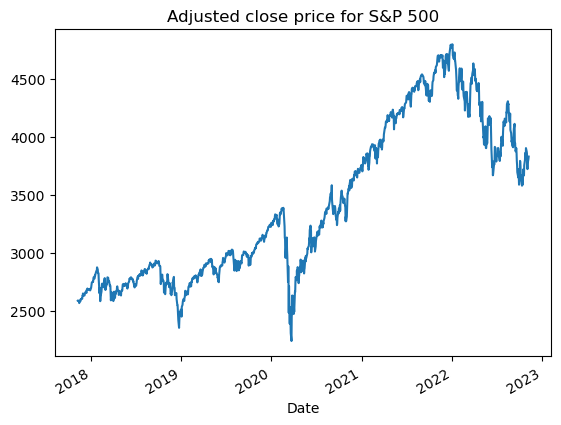

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline 
data_SP500.plot()
plt.title('Adjusted close price for S&P 500')
plt.show()

In [13]:
data_NQC.median()

9491.30029296875

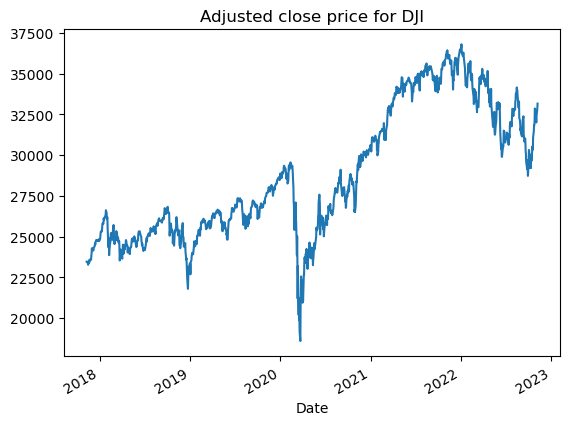

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline 
data_DJI.plot()
plt.title('Adjusted close price for DJI')
plt.show()

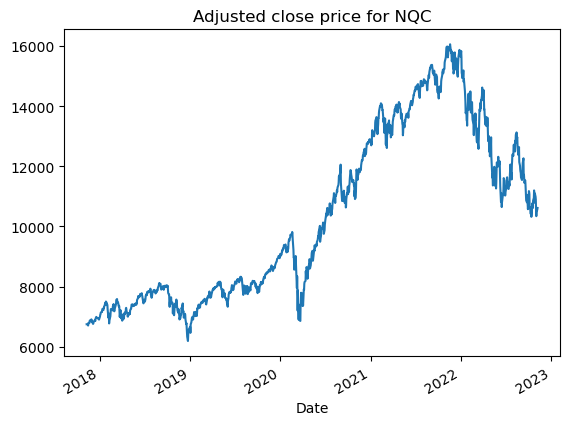

In [15]:
data_NQC.plot()
plt.title('Adjusted close price for NQC')
plt.show()

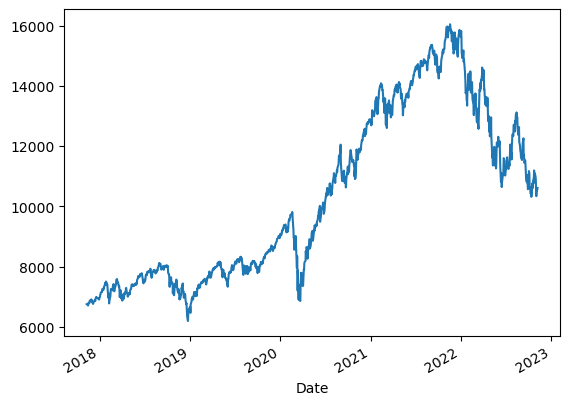

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline 
data_NQC.plot()
plt.show()

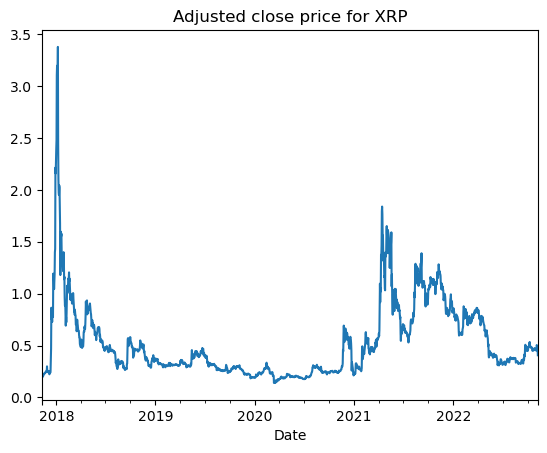

In [17]:
data_XRP.plot()
plt.title('Adjusted close price for XRP')
plt.show()

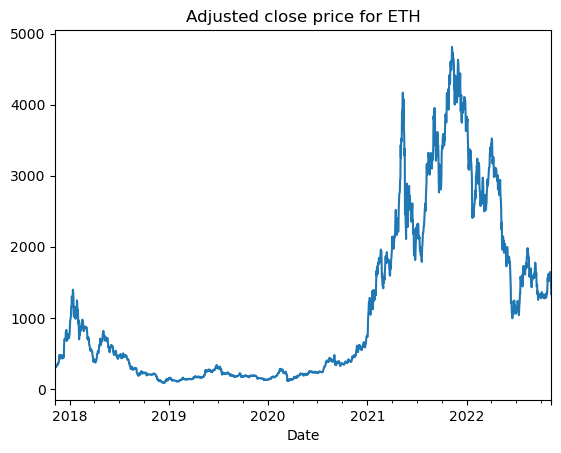

In [18]:
data_ETH.plot()
plt.title('Adjusted close price for ETH')
plt.show()

In [19]:
returns_XRP.kurt()

16.412733335008316

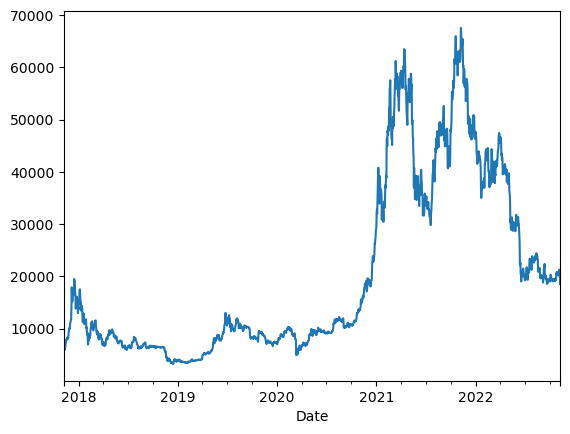

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline 
data_BTC.plot()
plt.show()

In [21]:
returns_NQC.kurt()

7.220853533611104

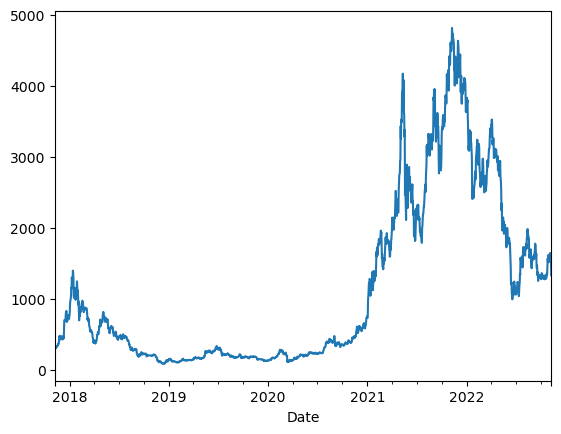

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline 
data_ETH.plot()
plt.show()

In [23]:
data_BTC.describe()

count     1826.000000
mean     20207.749404
std      17044.223289
min       3236.761719
25%       7627.129883
50%      10765.186035
75%      33740.259766
max      67566.828125
Name: Adj Close, dtype: float64



# ADF-test for stationarity 

In [24]:
# perform ADF test
result = adfuller(data_SP500, autolag='AIC')

# print test statistics
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# perform ADF test
result = adfuller(data_DJI, autolag='AIC')

# print test statistics
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


# perform ADF test
result = adfuller(data_NQC, autolag='AIC')

# print test statistics
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


# perform ADF test
result = adfuller(data_BTC, autolag='AIC')

# print test statistics
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


# perform ADF test
result = adfuller(data_ETH, autolag='AIC')

# print test statistics
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


# perform ADF test
result = adfuller(data_XRP, autolag='AIC')

# print test statistics
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])




ADF Statistic: -1.327505
p-value: 0.616497
ADF Statistic: -1.596954
p-value: 0.485124
ADF Statistic: -1.349589
p-value: 0.606191
ADF Statistic: -1.390863
p-value: 0.586648
ADF Statistic: -1.381905
p-value: 0.590920
ADF Statistic: -3.960228
p-value: 0.001634


# ARCH, GARCH, TGARCH for SP500

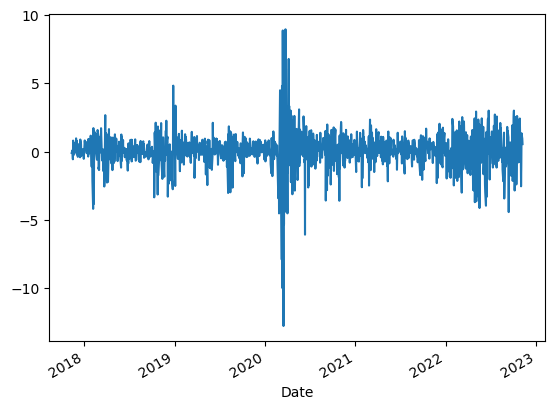

In [25]:
ax = returns_SP500.plot() # ploting the data

In [26]:
# Estimating a GARCH and ARCH models

model1 = arch_model(returns_SP500, p=1,o=0,q=0)
out1=model1.fit()
print(out1.summary())


Iteration:      1,   Func. Count:      5,   Neg. LLF: 7278.270268312334
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3539.364730504749
Iteration:      3,   Func. Count:     20,   Neg. LLF: 2376.7845567503236
Iteration:      4,   Func. Count:     25,   Neg. LLF: 2046.8779034283998
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1977.1533341774318
Iteration:      6,   Func. Count:     34,   Neg. LLF: 1976.5958081205185
Iteration:      7,   Func. Count:     38,   Neg. LLF: 1976.5290261249936
Iteration:      8,   Func. Count:     42,   Neg. LLF: 1976.5208427152693
Iteration:      9,   Func. Count:     46,   Neg. LLF: 1976.5204259941277
Iteration:     10,   Func. Count:     50,   Neg. LLF: 1976.520414469918
Iteration:     11,   Func. Count:     53,   Neg. LLF: 1976.5204144699128
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1976.520414469918
            Iterations: 11
            Function evaluations: 53
            Gradient evaluat

Iteration:      1,   Func. Count:      6,   Neg. LLF: 10500.559867910186
Iteration:      2,   Func. Count:     16,   Neg. LLF: 120062.49940446959
Iteration:      3,   Func. Count:     23,   Neg. LLF: 2276.5687425487336
Iteration:      4,   Func. Count:     30,   Neg. LLF: 738666786.0565207
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1795.8447172325396
Iteration:      6,   Func. Count:     43,   Neg. LLF: 1796.3678579604093
Iteration:      7,   Func. Count:     50,   Neg. LLF: 1795.4595266958308
Iteration:      8,   Func. Count:     56,   Neg. LLF: 1795.183492875551
Iteration:      9,   Func. Count:     61,   Neg. LLF: 1795.1834723976058
Iteration:     10,   Func. Count:     65,   Neg. LLF: 1795.1834723973993
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1795.1834723976058
            Iterations: 10
            Function evaluations: 65
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results      

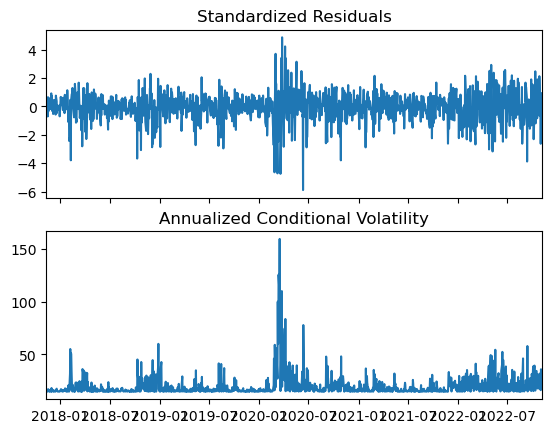

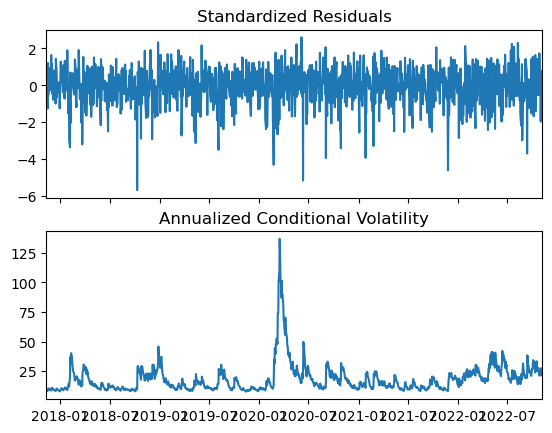

In [27]:
model2 = arch_model(returns_SP500, p=1,o=0,q=1)
out2=model2.fit()
print(out2.summary())

fig1 = out1.plot(annualize="D") #generating volatility graphs

fig2 = out2.plot(annualize="D") #generating volatility graphs

#Apply forecasting to this model

## FGARCH

Text(0.5, 1.0, 'Rolling Prediction')

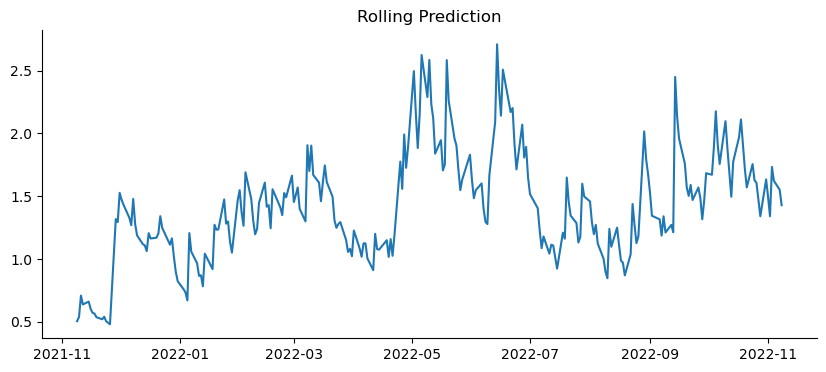

In [28]:
rolling_predictions = []
test_size = 252

for i in range(test_size):
    train = returns_SP500[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=returns_SP500.index[-252:])

fig,ax = plt.subplots(figsize=(10,4))
ax.spines[['top','right']].set_visible(False)
plt.plot(rolling_predictions)
plt.title('Rolling Prediction')

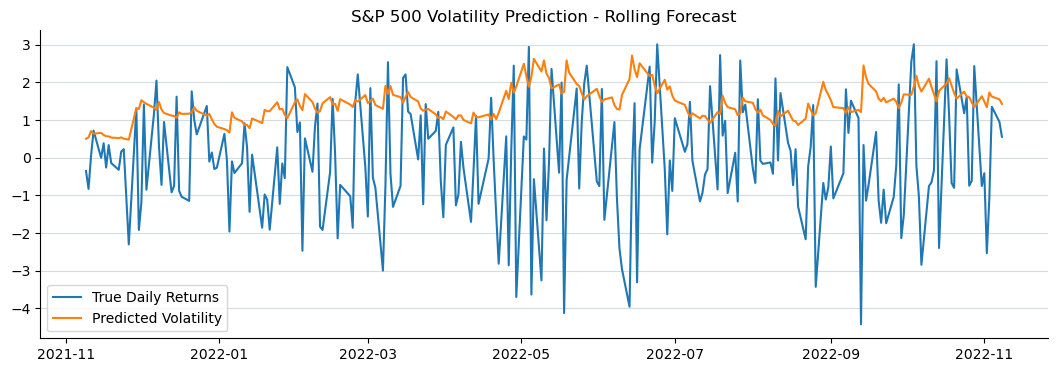

In [29]:
fig,ax = plt.subplots(figsize=(13,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
ax.spines[['top','right']].set_visible(False)
plt.plot(returns_SP500[-252:])
plt.plot(rolling_predictions)
plt.title('S&P 500 Volatility Prediction - Rolling Forecast')
plt.legend(['True Daily Returns', 'Predicted Volatility'])

Iteration:      1,   Func. Count:      7,   Neg. LLF: 9576.474316442938
Iteration:      2,   Func. Count:     18,   Neg. LLF: 7871.663831592765
Iteration:      3,   Func. Count:     28,   Neg. LLF: 5367.8660627379395
Iteration:      4,   Func. Count:     36,   Neg. LLF: 1799.210630197525
Iteration:      5,   Func. Count:     43,   Neg. LLF: 2125.5013766866205
Iteration:      6,   Func. Count:     50,   Neg. LLF: 1779.5422690666496
Iteration:      7,   Func. Count:     57,   Neg. LLF: 1785.3117471232
Iteration:      8,   Func. Count:     64,   Neg. LLF: 1791.422830816554
Iteration:      9,   Func. Count:     71,   Neg. LLF: 1775.0641721097304
Iteration:     10,   Func. Count:     78,   Neg. LLF: 1773.532731538242
Iteration:     11,   Func. Count:     84,   Neg. LLF: 1773.5272863582709
Iteration:     12,   Func. Count:     90,   Neg. LLF: 1773.5257075426061
Iteration:     13,   Func. Count:     96,   Neg. LLF: 1773.525481010931
Iteration:     14,   Func. Count:    102,   Neg. LLF: 1773.5

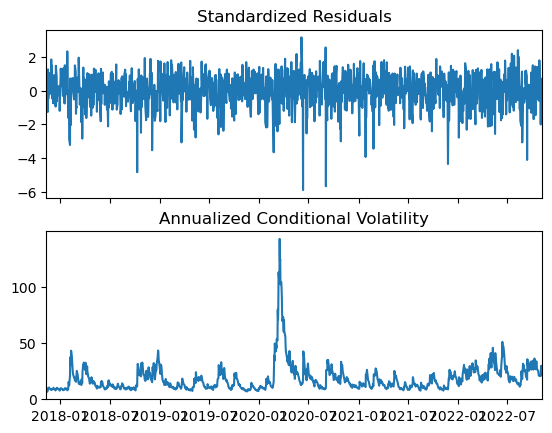

In [30]:
# Estimating TGARCH

model3= arch_model(returns_SP500, p=1, o=1, q=1, power=1.0)
out3= model3.fit()
print(out3.summary())
fig3 = out3.plot(annualize="D") #generating volatility graphs


# ARCH, GARCH, TARCH for NQC

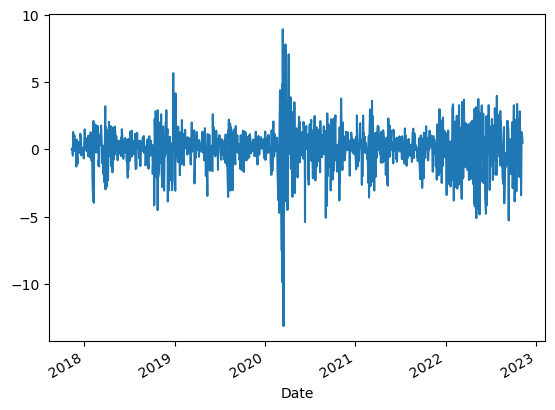

In [31]:
ax = returns_NQC.plot() # ploting the data

In [32]:
# Estimating a GARCH and ARCH models

model1 = arch_model(returns_NQC, p=1,o=0,q=0)
out1=model1.fit()
print(out1.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 6654.06744804803
Iteration:      2,   Func. Count:     13,   Neg. LLF: 4309.363653889042
Iteration:      3,   Func. Count:     20,   Neg. LLF: 2339.706724345738
Iteration:      4,   Func. Count:     25,   Neg. LLF: 6495.751369563442
Iteration:      5,   Func. Count:     30,   Neg. LLF: 2267.2775803688583
Iteration:      6,   Func. Count:     34,   Neg. LLF: 2267.2624918328625
Iteration:      7,   Func. Count:     38,   Neg. LLF: 2267.262195813225
Iteration:      8,   Func. Count:     41,   Neg. LLF: 2267.2621958130094
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2267.262195813225
            Iterations: 8
            Function evaluations: 41
            Gradient evaluations: 8
                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:  

Iteration:      1,   Func. Count:      6,   Neg. LLF: 8122.733796192866
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4889.343691053781
Iteration:      3,   Func. Count:     25,   Neg. LLF: 284211052.72472155
Iteration:      4,   Func. Count:     31,   Neg. LLF: 2100.4179514004477
Iteration:      5,   Func. Count:     37,   Neg. LLF: 2099.6953157201347
Iteration:      6,   Func. Count:     43,   Neg. LLF: 2338.392719141819
Iteration:      7,   Func. Count:     50,   Neg. LLF: 2099.107637060645
Iteration:      8,   Func. Count:     56,   Neg. LLF: 2099.0966026871556
Iteration:      9,   Func. Count:     62,   Neg. LLF: 2099.0957363819275
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2099.0957363819275
            Iterations: 9
            Function evaluations: 62
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:          

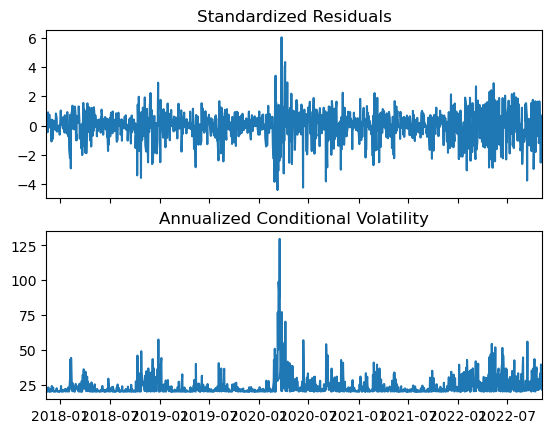

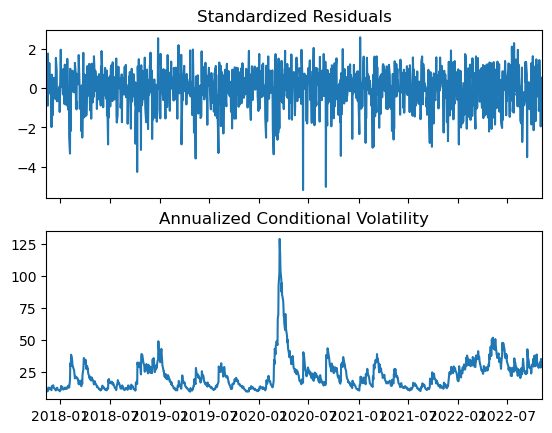

In [33]:
model2 = arch_model(returns_NQC, p=1,o=0,q=1)
out2=model2.fit()
print(out2.summary())

fig1 = out1.plot(annualize="D") #generating volatility graphs

fig2 = out2.plot(annualize="D") #generating volatility graphs


Iteration:      1,   Func. Count:      7,   Neg. LLF: 6559.690005689294
Iteration:      2,   Func. Count:     17,   Neg. LLF: 7580.606406165919
Iteration:      3,   Func. Count:     27,   Neg. LLF: 3468.432486022097
Iteration:      4,   Func. Count:     35,   Neg. LLF: 2706.00795628173
Iteration:      5,   Func. Count:     42,   Neg. LLF: 2089.584545272845
Iteration:      6,   Func. Count:     48,   Neg. LLF: 2122.983519529239
Iteration:      7,   Func. Count:     55,   Neg. LLF: 2126.4635742685805
Iteration:      8,   Func. Count:     62,   Neg. LLF: 2088.3031138631177
Iteration:      9,   Func. Count:     69,   Neg. LLF: 2120.8240146010094
Iteration:     10,   Func. Count:     76,   Neg. LLF: 2082.9400386429006
Iteration:     11,   Func. Count:     82,   Neg. LLF: 2082.976781680928
Iteration:     12,   Func. Count:     89,   Neg. LLF: 2083.0809096451367
Iteration:     13,   Func. Count:     96,   Neg. LLF: 2082.64847167705
Iteration:     14,   Func. Count:    102,   Neg. LLF: 2082.64

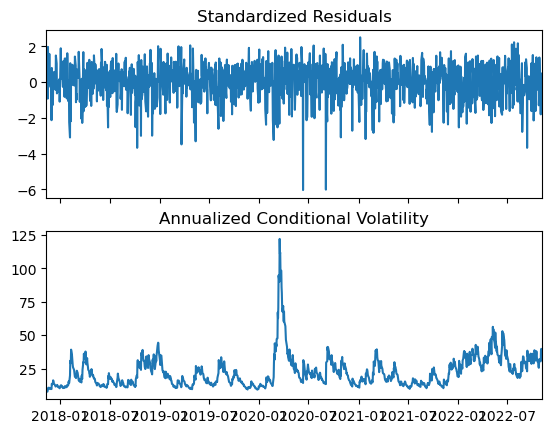

In [34]:
# Estimating TGARCH

model3= arch_model(returns_NQC, p=1, o=1, q=1, power=1)
out3= model3.fit()
print(out3.summary())
fig3 = out3.plot(annualize="D") #generating volatility graphs


#Apply forecasting to this model

## FTGARCH

Text(0.5, 1.0, 'Rolling Prediction')

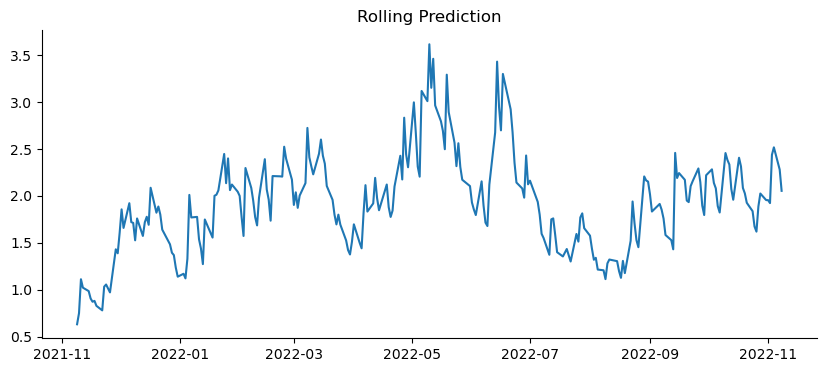

In [35]:
rolling_predictions = []
test_size = 252

for i in range(test_size):
    train = returns_NQC[:-(test_size-i)]
    model = arch_model(train, p=1, o=1, q=1, power=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=returns_NQC.index[-252:])

fig,ax = plt.subplots(figsize=(10,4))
ax.spines[['top','right']].set_visible(False)
plt.plot(rolling_predictions)
plt.title('Rolling Prediction')

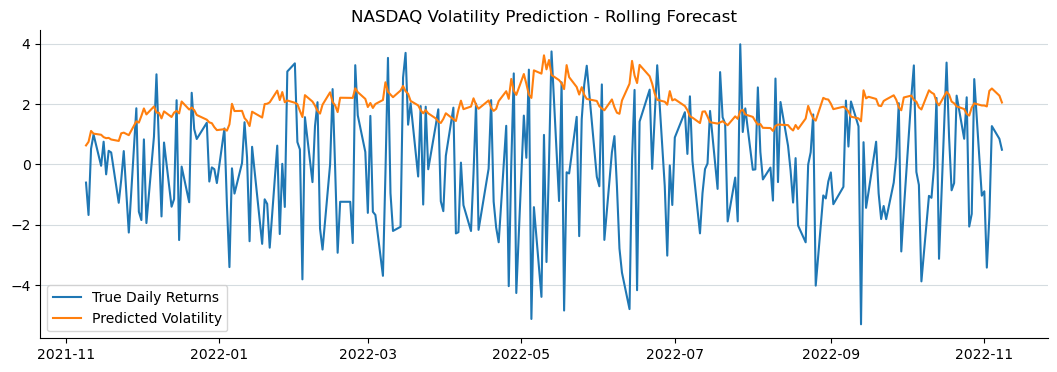

In [36]:
fig,ax = plt.subplots(figsize=(13,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
ax.spines[['top','right']].set_visible(False)
plt.plot(returns_NQC[-252:])
plt.plot(rolling_predictions)
plt.title('NASDAQ Volatility Prediction - Rolling Forecast')
plt.legend(['True Daily Returns', 'Predicted Volatility'])

# ARCH, GARCH, TARCH for DJI

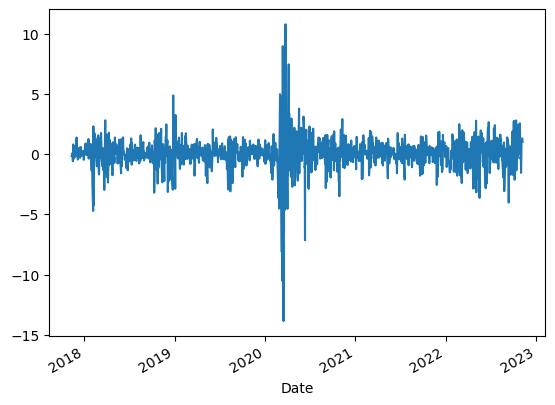

In [37]:
ax = returns_DJI.plot() # ploting the data

In [38]:
# Estimating a GARCH and ARCH models

model1 = arch_model(returns_DJI, p=1,o=0,q=0)
out1=model1.fit()
print(out1.summary())


Iteration:      1,   Func. Count:      5,   Neg. LLF: 7120.452832457662
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3553.472837134144
Iteration:      3,   Func. Count:     20,   Neg. LLF: 2514.664857699666
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1953.2467753151245
Iteration:      5,   Func. Count:     29,   Neg. LLF: 1952.8897854953016
Iteration:      6,   Func. Count:     34,   Neg. LLF: 1949.8580611074012
Iteration:      7,   Func. Count:     38,   Neg. LLF: 1949.8116900272557
Iteration:      8,   Func. Count:     42,   Neg. LLF: 1949.8081918921737
Iteration:      9,   Func. Count:     46,   Neg. LLF: 1949.8081458118672
Iteration:     10,   Func. Count:     49,   Neg. LLF: 1949.80814581185
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1949.8081458118672
            Iterations: 10
            Function evaluations: 49
            Gradient evaluations: 10
                      Constant Mean - ARCH Model Results         

Iteration:      1,   Func. Count:      6,   Neg. LLF: 8948.633734735875
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2863.495356121964
Iteration:      3,   Func. Count:     23,   Neg. LLF: 9083886.234145327
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1793.631255861397
Iteration:      5,   Func. Count:     38,   Neg. LLF: 1815.8584996834431
Iteration:      6,   Func. Count:     45,   Neg. LLF: 1777.9025530309673
Iteration:      7,   Func. Count:     51,   Neg. LLF: 1777.761152119533
Iteration:      8,   Func. Count:     56,   Neg. LLF: 1777.7611514964728
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1777.7611514964728
            Iterations: 8
            Function evaluations: 56
            Gradient evaluations: 8
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:

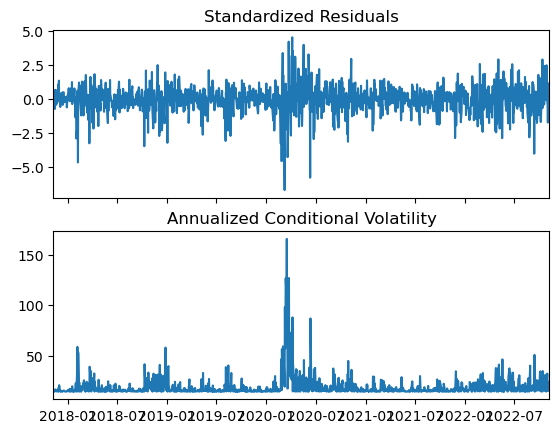

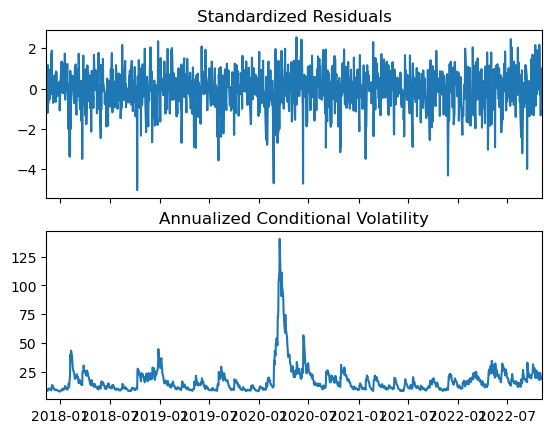

In [39]:
model2 = arch_model(returns_DJI, p=1,o=0,q=1)
out2=model2.fit()
print(out2.summary())

fig1 = out1.plot(annualize="D") #generating volatility graphs

fig2 = out2.plot(annualize="D") #generating volatility graphs


Iteration:      1,   Func. Count:      7,   Neg. LLF: 27084430.89940013
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1233454.9780048204
Iteration:      3,   Func. Count:     23,   Neg. LLF: 2182.0241985376024
Iteration:      4,   Func. Count:     31,   Neg. LLF: 2392.504710796312
Iteration:      5,   Func. Count:     38,   Neg. LLF: 1770.285410582191
Iteration:      6,   Func. Count:     44,   Neg. LLF: 1996.4742463161217
Iteration:      7,   Func. Count:     51,   Neg. LLF: 2115.1496621242377
Iteration:      8,   Func. Count:     60,   Neg. LLF: 1881.9051478045742
Iteration:      9,   Func. Count:     68,   Neg. LLF: 1811.598430686805
Iteration:     10,   Func. Count:     75,   Neg. LLF: 1755.620536960586
Iteration:     11,   Func. Count:     81,   Neg. LLF: 1758.4948274935718
Iteration:     12,   Func. Count:     88,   Neg. LLF: 1755.3020245019952
Iteration:     13,   Func. Count:     94,   Neg. LLF: 1755.2789814017563
Iteration:     14,   Func. Count:    100,   Neg. LLF: 17

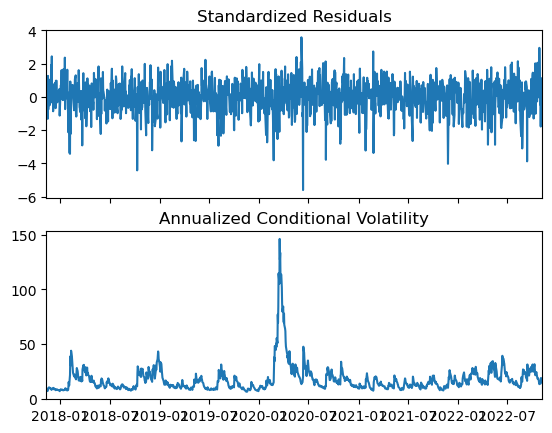

In [40]:
# Estimating TGARCH

model3= arch_model(returns_DJI, p=1, o=1, q=1, power=1.0)
out3= model3.fit()
print(out3.summary())
fig3 = out3.plot(annualize="D") #generating volatility graphs

#Apply forecasting to this model

Text(0.5, 1.0, 'Rolling Prediction')

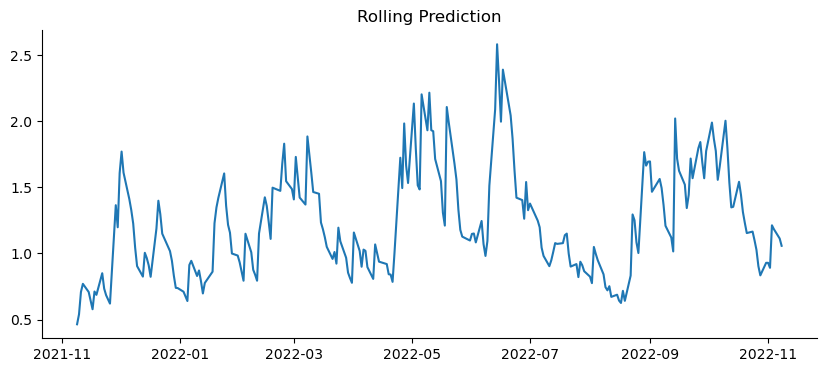

In [41]:
rolling_predictions = []
test_size = 252

for i in range(test_size):
    train = returns_DJI[:-(test_size-i)]
    model = arch_model(train, p=1, o=1, q=1, power=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=returns_DJI.index[-252:])

fig,ax = plt.subplots(figsize=(10,4))
ax.spines[['top','right']].set_visible(False)
plt.plot(rolling_predictions)
plt.title('Rolling Prediction')

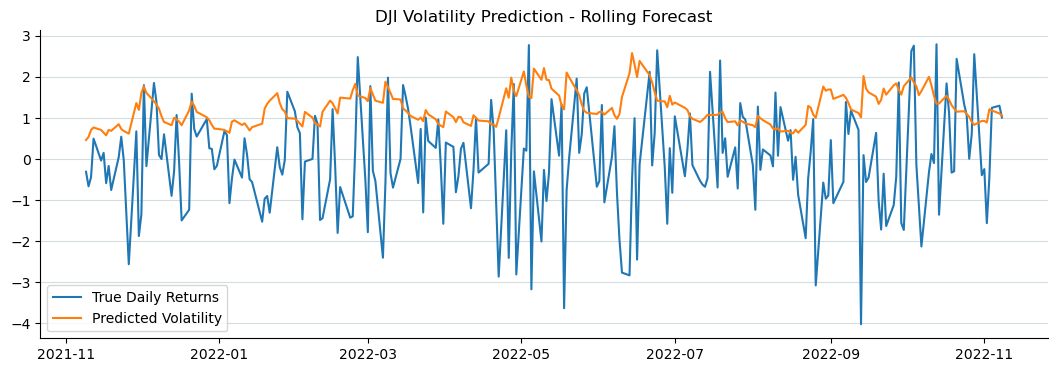

In [42]:
fig,ax = plt.subplots(figsize=(13,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
ax.spines[['top','right']].set_visible(False)
plt.plot(returns_DJI[-252:])
plt.plot(rolling_predictions)
plt.title('DJI Volatility Prediction - Rolling Forecast')
plt.legend(['True Daily Returns', 'Predicted Volatility'])

# ARCH, GARCH, TARCH for BTC

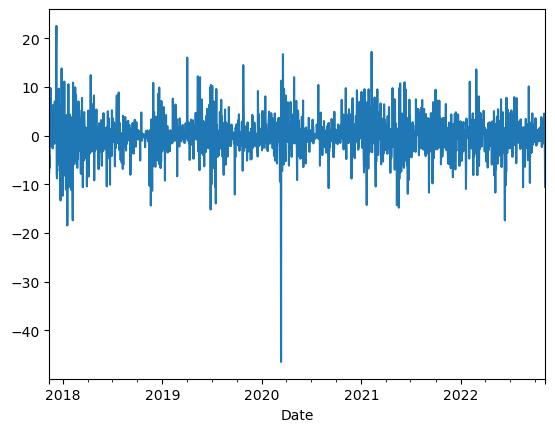

In [43]:
ax = returns_BTC.plot() # ploting the data

In [44]:
# Estimating a GARCH and ARCH models

model1 = arch_model(returns_BTC, p=1,o=0,q=0)
out1=model1.fit()
print(out1.summary())


Iteration:      1,   Func. Count:      5,   Neg. LLF: 5892.211175032496
Iteration:      2,   Func. Count:     12,   Neg. LLF: 8607.504779974812
Iteration:      3,   Func. Count:     18,   Neg. LLF: 5145.1884541631425
Iteration:      4,   Func. Count:     23,   Neg. LLF: 5162.932009584894
Iteration:      5,   Func. Count:     28,   Neg. LLF: 5145.186848108189
Iteration:      6,   Func. Count:     33,   Neg. LLF: 5126.975942299948
Iteration:      7,   Func. Count:     37,   Neg. LLF: 5126.701103666549
Iteration:      8,   Func. Count:     41,   Neg. LLF: 5126.695487414227
Iteration:      9,   Func. Count:     45,   Neg. LLF: 5126.695393268596
Iteration:     10,   Func. Count:     49,   Neg. LLF: 5126.695385891107
Iteration:     11,   Func. Count:     52,   Neg. LLF: 5126.69538589108
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5126.695385891107
            Iterations: 11
            Function evaluations: 52
            Gradient evaluations: 11

Iteration:      1,   Func. Count:      6,   Neg. LLF: 8302.570816491116
Iteration:      2,   Func. Count:     13,   Neg. LLF: 5430.251807952167
Iteration:      3,   Func. Count:     19,   Neg. LLF: 5246.842419786286
Iteration:      4,   Func. Count:     25,   Neg. LLF: 5143.355061299278
Iteration:      5,   Func. Count:     31,   Neg. LLF: 5086.94193111744
Iteration:      6,   Func. Count:     38,   Neg. LLF: 5382.625848553544
Iteration:      7,   Func. Count:     44,   Neg. LLF: 5056.857130605219
Iteration:      8,   Func. Count:     50,   Neg. LLF: 5051.663047717305
Iteration:      9,   Func. Count:     55,   Neg. LLF: 5051.625088490958
Iteration:     10,   Func. Count:     60,   Neg. LLF: 5051.624777005569
Iteration:     11,   Func. Count:     65,   Neg. LLF: 5051.624771688373
Iteration:     12,   Func. Count:     69,   Neg. LLF: 5051.624771687949
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5051.624771688373
            Iterations: 12
  

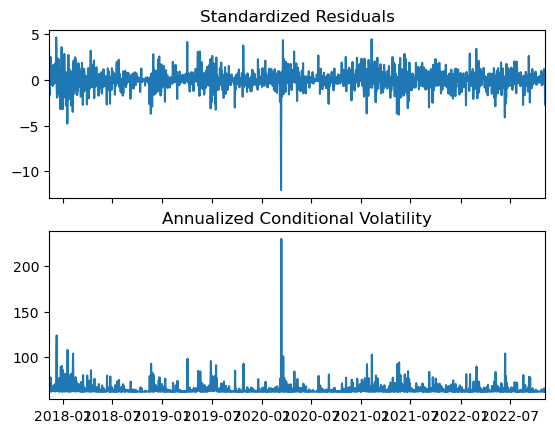

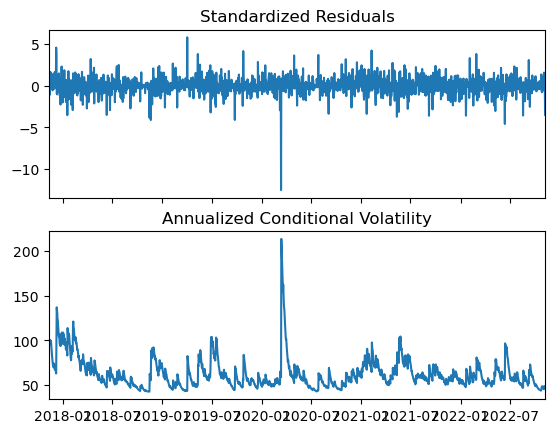

In [45]:
model2 = arch_model(returns_BTC, p=1,o=0,q=1)
out2=model2.fit()
print(out2.summary())

fig1 = out1.plot(annualize="D") #generating volatility graphs

fig2 = out2.plot(annualize="D") #generating volatility graphs
#Apply forecasting to this model

Text(0.5, 1.0, 'Rolling Prediction')

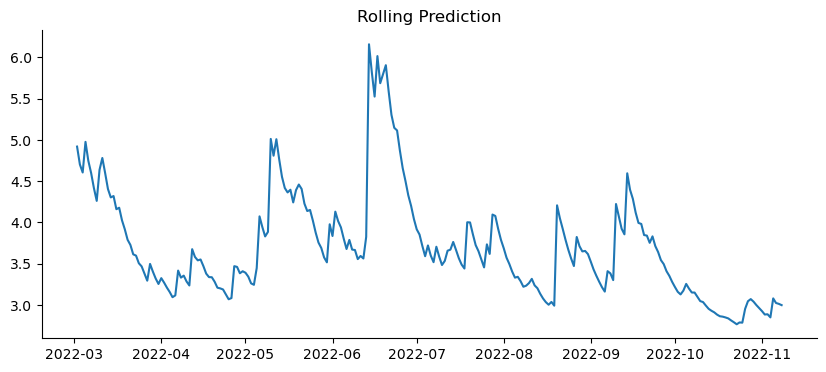

In [46]:
rolling_predictions = []
test_size = 252

for i in range(test_size):
    train = returns_BTC[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=returns_BTC.index[-252:])

fig,ax = plt.subplots(figsize=(10,4))
ax.spines[['top','right']].set_visible(False)
plt.plot(rolling_predictions)
plt.title('Rolling Prediction')

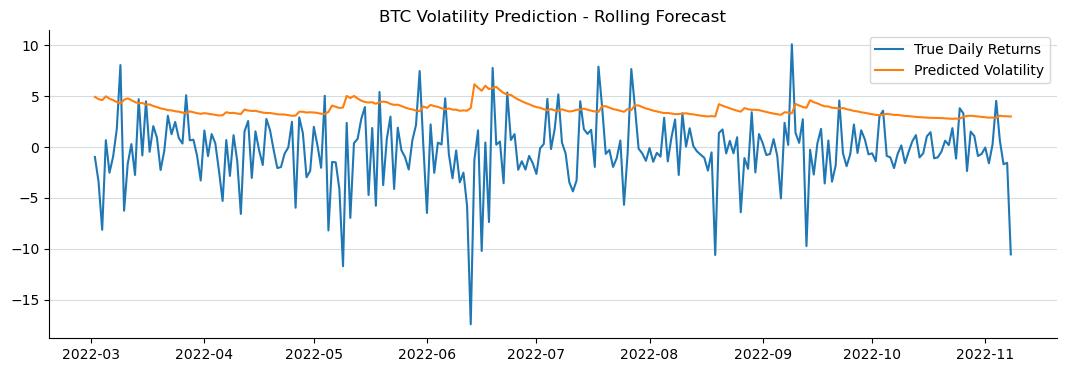

In [47]:
fig,ax = plt.subplots(figsize=(13,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
ax.spines[['top','right']].set_visible(False)
plt.plot(returns_BTC[-252:])
plt.plot(rolling_predictions)
plt.title('BTC Volatility Prediction - Rolling Forecast')
plt.legend(['True Daily Returns', 'Predicted Volatility'])

Iteration:      1,   Func. Count:      7,   Neg. LLF: 8649.454181000045
Iteration:      2,   Func. Count:     18,   Neg. LLF: 12025.963119409065
Iteration:      3,   Func. Count:     26,   Neg. LLF: 16629.21865708825
Iteration:      4,   Func. Count:     35,   Neg. LLF: 5868.446300758605
Iteration:      5,   Func. Count:     43,   Neg. LLF: 5060.8057679649755
Iteration:      6,   Func. Count:     50,   Neg. LLF: 5868.409913473495
Iteration:      7,   Func. Count:     57,   Neg. LLF: 5061.98714004694
Iteration:      8,   Func. Count:     64,   Neg. LLF: 5050.610634556251
Iteration:      9,   Func. Count:     71,   Neg. LLF: 5048.555682095242
Iteration:     10,   Func. Count:     77,   Neg. LLF: 5048.538236842298
Iteration:     11,   Func. Count:     83,   Neg. LLF: 5048.537370114494
Iteration:     12,   Func. Count:     89,   Neg. LLF: 5048.53715599074
Iteration:     13,   Func. Count:     95,   Neg. LLF: 5048.537152220497
Iteration:     14,   Func. Count:    100,   Neg. LLF: 5048.53715

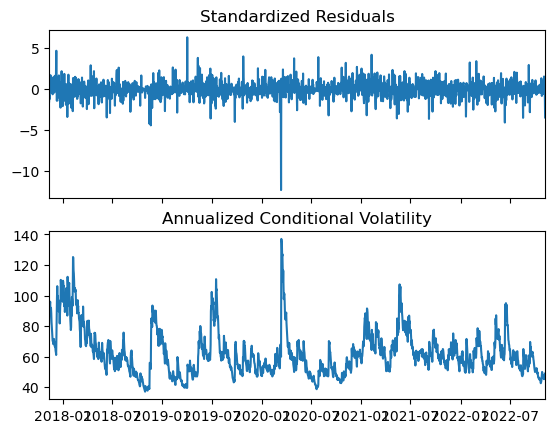

In [48]:
# Estimating TGARCH

model3= arch_model(returns_BTC, p=1, o=1, q=1, power=1.0)
out3= model3.fit()
print(out3.summary())
fig3 = out3.plot(annualize="D") #generating volatility graphs


# ARCH, GARCH, TARCH for ETH

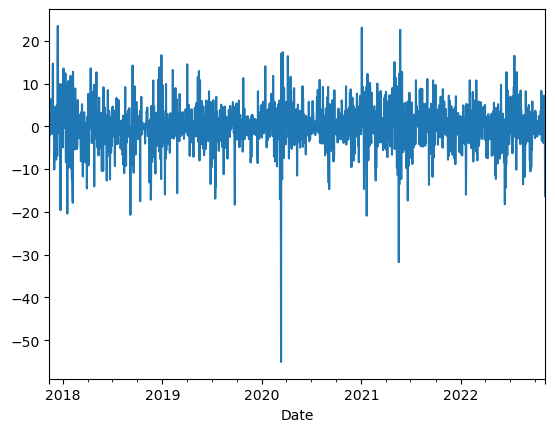

In [49]:
ax = returns_ETH.plot() # ploting the data

In [50]:
# Estimating a GARCH and ARCH models

model1 = arch_model(returns_ETH, p=1,o=0,q=0)
out1=model1.fit()
print(out1.summary())


Iteration:      1,   Func. Count:      5,   Neg. LLF: 6147.120912068036
Iteration:      2,   Func. Count:     11,   Neg. LLF: 23185.67423457352
Iteration:      3,   Func. Count:     17,   Neg. LLF: 5585.403756418951
Iteration:      4,   Func. Count:     21,   Neg. LLF: 5687.562526103238
Iteration:      5,   Func. Count:     27,   Neg. LLF: 5823.3011475971025
Iteration:      6,   Func. Count:     32,   Neg. LLF: 5573.119258429815
Iteration:      7,   Func. Count:     36,   Neg. LLF: 5573.110609775609
Iteration:      8,   Func. Count:     40,   Neg. LLF: 5573.101380663125
Iteration:      9,   Func. Count:     44,   Neg. LLF: 5573.099427736918
Iteration:     10,   Func. Count:     48,   Neg. LLF: 5573.096872865761
Iteration:     11,   Func. Count:     52,   Neg. LLF: 5573.09594763927
Iteration:     12,   Func. Count:     56,   Neg. LLF: 5573.095760259312
Iteration:     13,   Func. Count:     60,   Neg. LLF: 5573.095750903445
Iteration:     14,   Func. Count:     63,   Neg. LLF: 5573.09575

Iteration:      1,   Func. Count:      6,   Neg. LLF: 9272.060718171015
Iteration:      2,   Func. Count:     13,   Neg. LLF: 5547.819349465247
Iteration:      3,   Func. Count:     19,   Neg. LLF: 5615.068058282221
Iteration:      4,   Func. Count:     25,   Neg. LLF: 5616.513772910997
Iteration:      5,   Func. Count:     31,   Neg. LLF: 5539.850229321693
Iteration:      6,   Func. Count:     38,   Neg. LLF: 5514.529044037501
Iteration:      7,   Func. Count:     44,   Neg. LLF: 5513.876551867099
Iteration:      8,   Func. Count:     49,   Neg. LLF: 5513.874033156091
Iteration:      9,   Func. Count:     54,   Neg. LLF: 5513.872913965444
Iteration:     10,   Func. Count:     59,   Neg. LLF: 5513.8728235367735
Iteration:     11,   Func. Count:     64,   Neg. LLF: 5513.872821764719
Iteration:     12,   Func. Count:     68,   Neg. LLF: 5513.872821764592
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5513.872821764719
            Iterations: 12


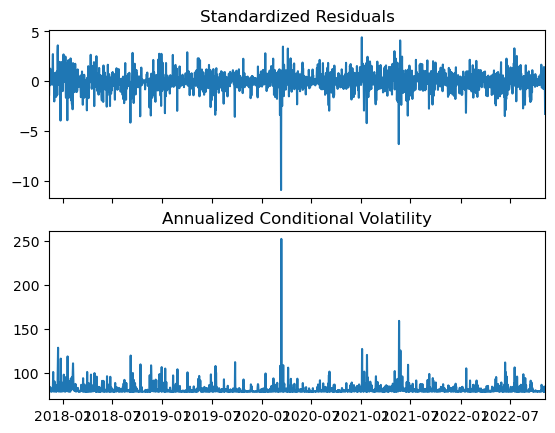

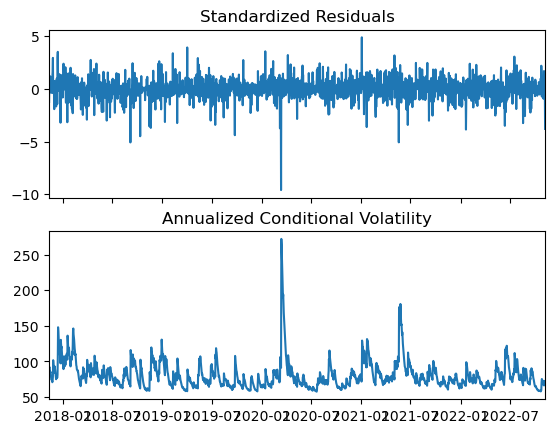

In [51]:
model2 = arch_model(returns_ETH, p=1,o=0,q=1)
out2=model2.fit()
print(out2.summary())

fig1 = out1.plot(annualize="D") #generating volatility graphs

fig2 = out2.plot(annualize="D") #generating volatility graphs
#Apply forecasting to this model

Text(0.5, 1.0, 'Rolling Prediction')

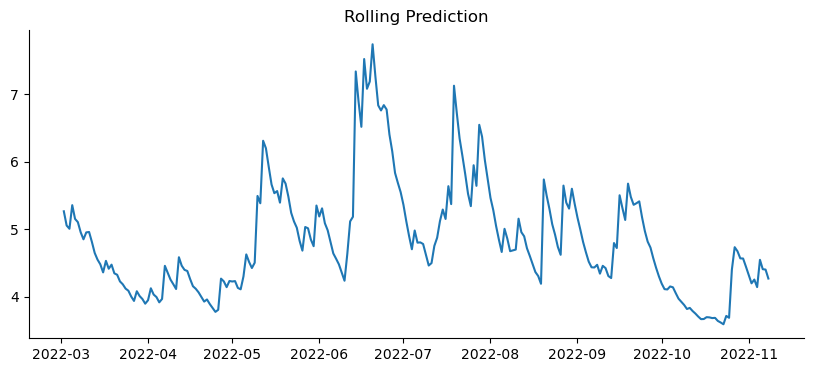

In [52]:
rolling_predictions = []
test_size = 252

for i in range(test_size):
    train = returns_ETH[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=returns_ETH.index[-252:])

fig,ax = plt.subplots(figsize=(10,4))
ax.spines[['top','right']].set_visible(False)
plt.plot(rolling_predictions)
plt.title('Rolling Prediction')

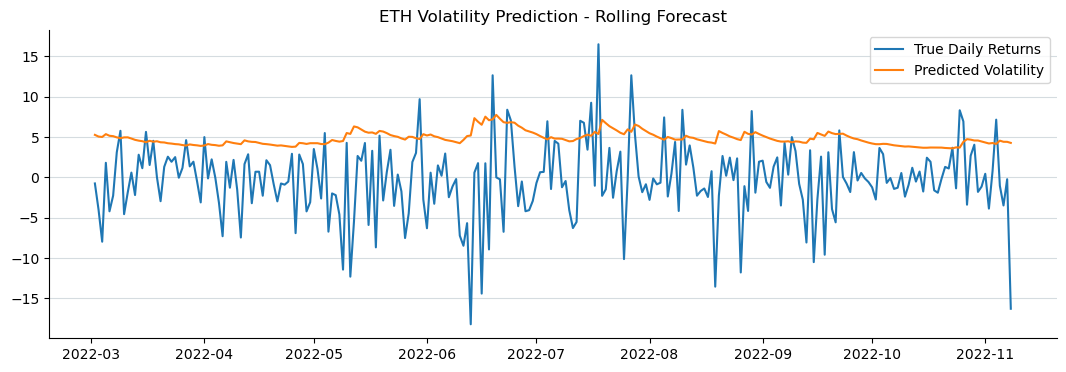

In [53]:
fig,ax = plt.subplots(figsize=(13,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
ax.spines[['top','right']].set_visible(False)
plt.plot(returns_ETH[-252:])
plt.plot(rolling_predictions)
plt.title('ETH Volatility Prediction - Rolling Forecast')
plt.legend(['True Daily Returns', 'Predicted Volatility'])

Iteration:      1,   Func. Count:      7,   Neg. LLF: 8635.187240057488
Iteration:      2,   Func. Count:     17,   Neg. LLF: 10647.016427339926
Iteration:      3,   Func. Count:     25,   Neg. LLF: 6336.800641704361
Iteration:      4,   Func. Count:     33,   Neg. LLF: 13254.61434968414
Iteration:      5,   Func. Count:     41,   Neg. LLF: 5532.213877478638
Iteration:      6,   Func. Count:     47,   Neg. LLF: 5852.626362283624
Iteration:      7,   Func. Count:     54,   Neg. LLF: 5614.57943241692
Iteration:      8,   Func. Count:     63,   Neg. LLF: 5519.502488006601
Iteration:      9,   Func. Count:     69,   Neg. LLF: 5518.653481366272
Iteration:     10,   Func. Count:     75,   Neg. LLF: 5519.099475823049
Iteration:     11,   Func. Count:     82,   Neg. LLF: 5518.323494156355
Iteration:     12,   Func. Count:     88,   Neg. LLF: 5518.314837200338
Iteration:     13,   Func. Count:     94,   Neg. LLF: 5518.309065005704
Iteration:     14,   Func. Count:    100,   Neg. LLF: 5518.30817

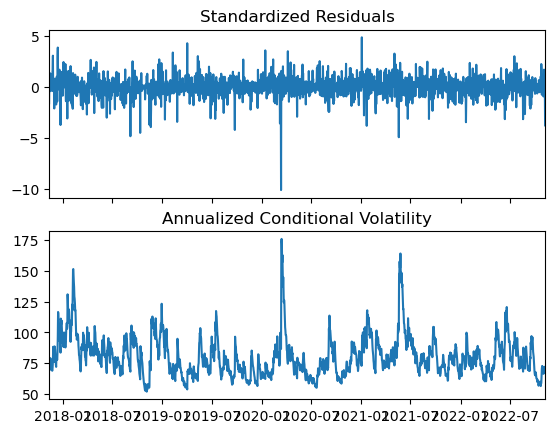

In [54]:
# Estimating TGARCH

model3= arch_model(returns_ETH, p=1, o=1, q=1, power=1.0)
out3= model3.fit()
print(out3.summary())
fig3 = out3.plot(annualize="D") #generating volatility graphs


# ARCH, GARCH, TARCH for XRP

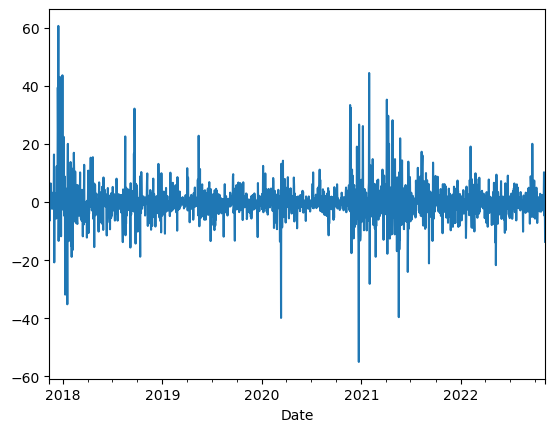

In [55]:
ax = returns_XRP.plot() # ploting the data

In [56]:
# Estimating a GARCH and ARCH models

model1 = arch_model(returns_XRP, p=1,o=0,q=0)
out1=model1.fit()
print(out1.summary())




Iteration:      1,   Func. Count:      5,   Neg. LLF: 8238.150159584098
Iteration:      2,   Func. Count:     11,   Neg. LLF: 6026.967819666308
Iteration:      3,   Func. Count:     16,   Neg. LLF: 5935.964873706997
Iteration:      4,   Func. Count:     21,   Neg. LLF: 6320.154404445489
Iteration:      5,   Func. Count:     26,   Neg. LLF: 5821.516730254703
Iteration:      6,   Func. Count:     31,   Neg. LLF: 5817.7723995930055
Iteration:      7,   Func. Count:     35,   Neg. LLF: 5817.600206788448
Iteration:      8,   Func. Count:     39,   Neg. LLF: 5817.5768083942585
Iteration:      9,   Func. Count:     43,   Neg. LLF: 5817.57592505092
Iteration:     10,   Func. Count:     47,   Neg. LLF: 5817.575919008504
Iteration:     11,   Func. Count:     50,   Neg. LLF: 5817.5759190085455
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5817.575919008504
            Iterations: 11
            Function evaluations: 50
            Gradient evaluations: 

Iteration:      1,   Func. Count:      6,   Neg. LLF: 10166.07980363804
Iteration:      2,   Func. Count:     13,   Neg. LLF: 10393.884583288682
Iteration:      3,   Func. Count:     20,   Neg. LLF: 6166.0222603671555
Iteration:      4,   Func. Count:     26,   Neg. LLF: 5649.295222912524
Iteration:      5,   Func. Count:     31,   Neg. LLF: 6045.180913505017
Iteration:      6,   Func. Count:     38,   Neg. LLF: 5649.775411367647
Iteration:      7,   Func. Count:     44,   Neg. LLF: 5648.696718140824
Iteration:      8,   Func. Count:     49,   Neg. LLF: 5648.644159373438
Iteration:      9,   Func. Count:     54,   Neg. LLF: 5648.6360314942485
Iteration:     10,   Func. Count:     59,   Neg. LLF: 5648.634211452974
Iteration:     11,   Func. Count:     64,   Neg. LLF: 5648.634070814081
Iteration:     12,   Func. Count:     69,   Neg. LLF: 5648.634063373499
Iteration:     13,   Func. Count:     73,   Neg. LLF: 5648.634063374149
Optimization terminated successfully    (Exit mode 0)
       

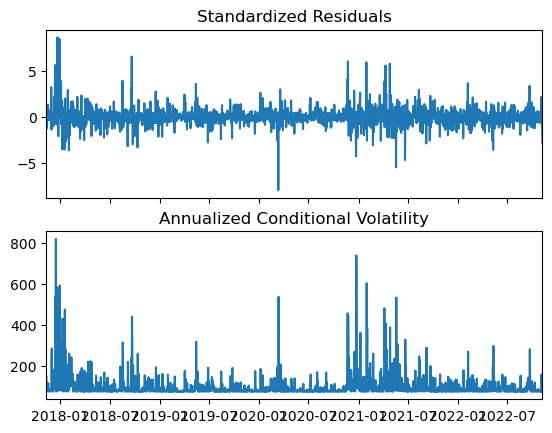

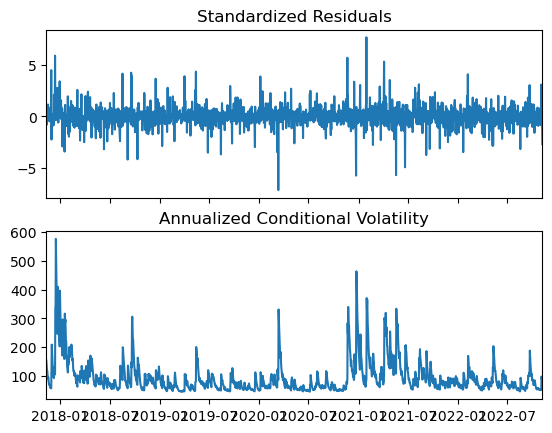

In [57]:
model2 = arch_model(returns_XRP, p=1,o=0,q=1)
out2=model2.fit()
print(out2.summary())

fig1 = out1.plot(annualize="D") #generating volatility graphs

fig2 = out2.plot(annualize="D") #generating volatility graphs


Iteration:      1,   Func. Count:      7,   Neg. LLF: 10213.32108557333
Iteration:      2,   Func. Count:     18,   Neg. LLF: 9396.57102002663
Iteration:      3,   Func. Count:     26,   Neg. LLF: 8652.095469871183
Iteration:      4,   Func. Count:     33,   Neg. LLF: 6420.758179749053
Iteration:      5,   Func. Count:     40,   Neg. LLF: 7972.391202630319
Iteration:      6,   Func. Count:     48,   Neg. LLF: 5695.421925594963
Iteration:      7,   Func. Count:     55,   Neg. LLF: 5641.406208961678
Iteration:      8,   Func. Count:     61,   Neg. LLF: 5891.0115185078175
Iteration:      9,   Func. Count:     69,   Neg. LLF: 5639.750371345264
Iteration:     10,   Func. Count:     75,   Neg. LLF: 5639.69415454217
Iteration:     11,   Func. Count:     81,   Neg. LLF: 5639.690867543247
Iteration:     12,   Func. Count:     87,   Neg. LLF: 5639.690573158031
Iteration:     13,   Func. Count:     93,   Neg. LLF: 5639.690550019226
Iteration:     14,   Func. Count:     98,   Neg. LLF: 5639.690549

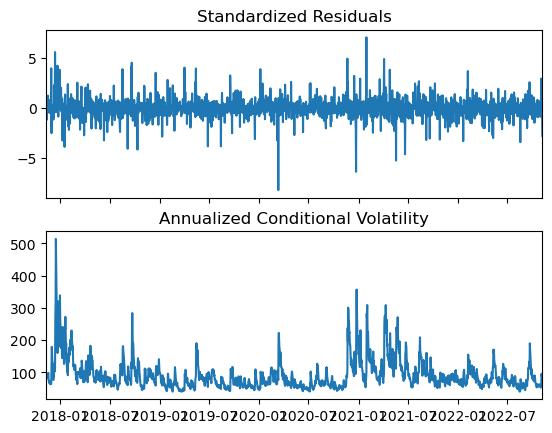

In [58]:
# Estimating TGARCH

model3= arch_model(returns_XRP, p=1, o=1, q=1, power=1.0)
out3= model3.fit()
print(out3.summary())
fig3 = out3.plot(annualize="D") #generating volatility graphs
